In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [5]:
base = automap_base()
base.prepare(autoload_with=engine)

In [6]:
# reflect an existing database into a new model
from numpy import inner

measurement_data = pd.read_sql("SELECT * FROM measurement", conn)
station_data = pd.read_sql("SELECT * FROM station", conn)

# reflect the tables

data = pd.merge(measurement_data, station_data, on="station")
data


,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [9]:
# View all of the classes that automap found


base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement


In [10]:
# Create our session (link) from Python to the DB

Session=Session(engine)


In [11]:
# Session.query(measurement.date)
Session.execute("SELECT measurement.date AS measurement_date FROM measurement")

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
recent_date = Session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

#from stackoverflow
#https://stackoverflow.com/questions/8551952/how-to-get-last-record

('2017-08-23',)


In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


date_string = str(recent_date[0])
# convert to string first
date_format = dt.datetime.strptime(recent_date[0], "%Y-%m-%d")
date_query = dt.date(int(date_format.strftime("%Y")), int(date_format.strftime("%m")), int(date_format.strftime("%d"))) - dt.timedelta(days=365)
print(date_query)





2016-08-23


In [55]:
# Perform a query to retrieve the data and precipitation scores
precip_score = Session.query(measurement.date, measurement.prcp).filter(measurement.date >= date_query).all()
# print(precip_score)



In [56]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(precip_score, columns=["Date", "Precipitation"])
results_df.set_index("Date", inplace=True)

# Sort the dataframe by date
print(results_df.sort_values(by=["Date"]))
# https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/




            Precipitation
Date                     
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
...                   ...
2017-08-22           0.00
2017-08-23           0.00
2017-08-23           0.00
2017-08-23           0.08
2017-08-23           0.45

[2230 rows x 1 columns]


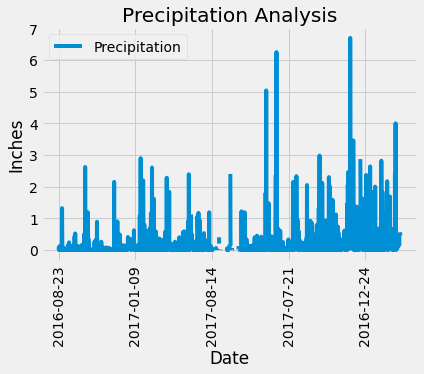

In [57]:
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot()
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.ylabel("Inches")

plt.show()



In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number stations in the dataset
total_stations=Session.query(station).count()
print(total_stations)


9


In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = Session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

for x in most_active_station:
    print(x)



('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = most_active_station[0][0]
print(f"The Most Active Station ID: ", most_active)

lowest_temp = Session.query(func.min(measurement.tobs))
print(f"The Lowest Temperature: ", lowest_temp[0][0])

highest_temp = Session.query(func.max(measurement.tobs))
print(f"The Highest Temperature: ", highest_temp[0][0])

avg_temp = Session.query(func.avg(measurement.tobs))
print(f"The Average Temperature: ", avg_temp[0][0])


The Most Active Station ID:  USC00519281
The Lowest Temperature:  53.0
The Highest Temperature:  87.0
The Average Temperature:  73.09795396419437


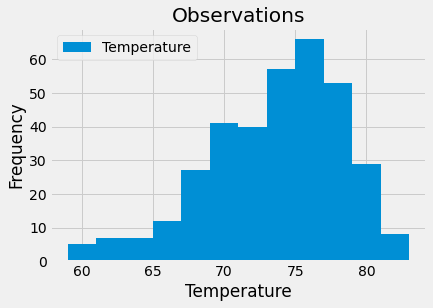

In [81]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation = (Session.query(measurement.tobs).filter(measurement.date >= date_query).filter(measurement.station == most_active).all())
observation_df = pd.DataFrame(observation, columns=["Temperature"])

observation_df.plot(kind='hist', bins=12)
plt.title("Observations")
plt.xlabel("Temperature")
plt.show()

# Close session

In [83]:
# Close Session
Session.close()